In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

In [2]:
info_patents = pd.read_pickle("../info_patents")


In [3]:
info_patents = info_patents.dropna()

In [9]:
info_patents.ipc_section

0          [A, C]
1             [H]
2             [G]
3             [G]
4          [A, C]
            ...  
1915705       [G]
1915707       [A]
1915708       [G]
1915709       [H]
1915710       [G]
Name: ipc_section, Length: 1824051, dtype: object

In [11]:
mlb = MultiLabelBinarizer()
dummies = pd.DataFrame(mlb.fit_transform(info_patents.ipc_section),columns=mlb.classes_, index=info_patents.index)
dummies = dummies[['A','B','C','D','E','F','G','H']]

In [17]:
for el in list(dummies.columns):
    info_patents[el]=dummies[el]

In [19]:
info_patents

,patent_number,patent_date,patent_processing_time,ipc_section,assignee_id,wipos,marked,A,B,C,D,E,F,G,H
0,5387603,1995-02-07,433,"[A, C]",[5330279e-a21e-438c-80d1-7e6ae793c092],"[16, 14]",1.0,1,0,1,0,0,0,0,0
1,5771295,1998-06-23,552,[H],[2986e46e-7937-477f-9bc5-1f5eec05183f],[2],1.0,0,0,0,0,0,0,0,1
2,5585587,1996-12-17,832,[G],[f7152515-d420-42d9-a7b6-3a2796bc5d10],"[34, 2, 10]",1.0,0,0,0,0,0,0,1,0
3,5321490,1994-06-14,568,[G],[ec72750e-f789-4749-91f7-6292f7c6fda7],"[10, 12, 29]",1.0,0,0,0,0,0,0,1,0
4,5750497,1998-05-12,1161,"[A, C]",[9a3afa40-66e5-4921-b831-64287f2052e0],"[16, 15]",1.0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915705,8386822,2013-02-26,1852,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0,0,0,0,0,0,0,1,0
1915707,4192319,1980-03-11,893,[A],[fa543ac8-5ee8-4999-b949-6c8a3dbae65d],[13],0.0,1,0,0,0,0,0,0,0
1915708,8386739,2013-02-26,1247,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0,0,0,0,0,0,0,1,0
1915709,4191891,1980-03-04,481,[H],[f2d3dc32-b29c-4c55-ab6d-736b4ee8b96b],[13],0.0,0,0,0,0,0,0,0,1


In [27]:
patents_to_drop = info_patents[(info_patents.A==0) & (info_patents.B==0) & (info_patents.C==0) & (info_patents.D==0) & (info_patents.E==0) & (info_patents.F==0) & (info_patents.G==0) & (info_patents.H==0)].patent_number

In [29]:
info_patents = info_patents[~info_patents.patent_number.isin(list(patents_to_drop))]

In [30]:
info_patents

,patent_number,patent_date,patent_processing_time,ipc_section,assignee_id,wipos,marked,A,B,C,D,E,F,G,H
0,5387603,1995-02-07,433,"[A, C]",[5330279e-a21e-438c-80d1-7e6ae793c092],"[16, 14]",1.0,1,0,1,0,0,0,0,0
1,5771295,1998-06-23,552,[H],[2986e46e-7937-477f-9bc5-1f5eec05183f],[2],1.0,0,0,0,0,0,0,0,1
2,5585587,1996-12-17,832,[G],[f7152515-d420-42d9-a7b6-3a2796bc5d10],"[34, 2, 10]",1.0,0,0,0,0,0,0,1,0
3,5321490,1994-06-14,568,[G],[ec72750e-f789-4749-91f7-6292f7c6fda7],"[10, 12, 29]",1.0,0,0,0,0,0,0,1,0
4,5750497,1998-05-12,1161,"[A, C]",[9a3afa40-66e5-4921-b831-64287f2052e0],"[16, 15]",1.0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915705,8386822,2013-02-26,1852,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0,0,0,0,0,0,0,1,0
1915707,4192319,1980-03-11,893,[A],[fa543ac8-5ee8-4999-b949-6c8a3dbae65d],[13],0.0,1,0,0,0,0,0,0,0
1915708,8386739,2013-02-26,1247,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0,0,0,0,0,0,0,1,0
1915709,4191891,1980-03-04,481,[H],[f2d3dc32-b29c-4c55-ab6d-736b4ee8b96b],[13],0.0,0,0,0,0,0,0,0,1


In [58]:
ipc_class = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
repartition_marked = []
repartition_unmarked = []
repartition_total = []

for index, el in enumerate(ipc_class):
    nb_marked = info_patents[info_patents.marked==1][el].value_counts()[1]
    nb_unmarked = info_patents[info_patents.marked==0][el].value_counts()[1]
    repartition_marked.append(nb_marked)
    repartition_unmarked.append(nb_unmarked)
    repartition_total.append(nb_marked+nb_unmarked)

In [81]:
np.sum(repartition_total)

2178464

<BarContainer object of 8 artists>

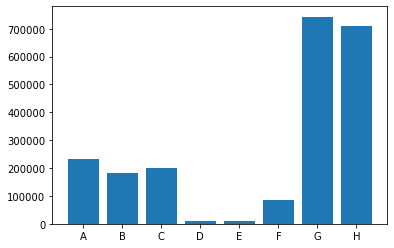

In [80]:
plt.bar(ipc_class,repartition_total)